In [1]:
import pandas as pd
import pandas as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report

In [4]:
df = pd.read_csv(r"D:\DataScience\Datascience Assignment\10)Pharma_Industry.csv")
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [5]:
# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [7]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [8]:
print(df.columns)

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')


In [9]:
# Cheack target variable distribution

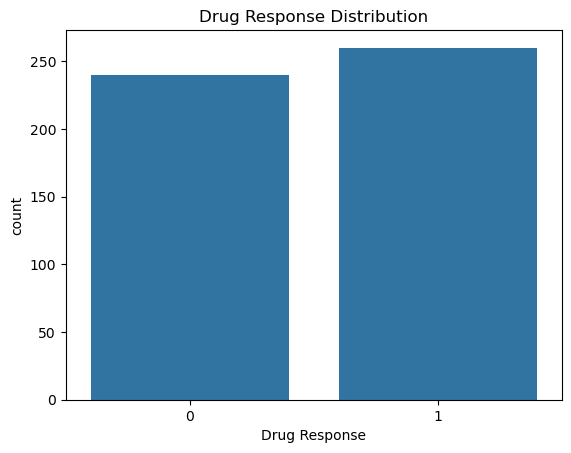

In [10]:
sns.countplot(x="Drug Response", data=df)
plt.title("Drug Response Distribution")
plt.show()

In [11]:
# Handle Categorical Columns (if any)

In [12]:
cat_cols = df.select_dtypes(include="object").columns

In [13]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [32]:
#  Define X (features) and y (target)
X = df.drop("Drug Response", axis=1)
y = df["Drug Response"]
print(X)
print(y)

     Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0           -0.128538                        0.303280         -1.881849   
1           -1.846188                        2.865142         -0.929511   
2           -1.252393                       -1.541613          0.363632   
3            1.992515                       -1.142779         -0.766657   
4            0.377100                        0.538410         -0.029263   
..                ...                             ...               ...   
495         -1.553759                        0.506938          0.817890   
496          0.551476                        1.714321          0.340589   
497         -1.072743                       -0.221137          0.239247   
498          1.661259                        0.245759         -0.457096   
499         -1.143726                        0.715320          0.108560   

     Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  
0                      0.258286     

In [15]:
# Feature Scaling

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.09273221,  0.07086708, -2.00279127,  0.20699008, -0.63101326],
       [-1.84738722,  2.12640939, -1.02201554,  2.85517419, -0.55717838],
       [-1.24080023, -1.409406  ,  0.30974143, -0.38554542,  0.36954055],
       ...,
       [-1.05727947, -0.34990534,  0.18164218,  1.07463034, -0.11597186],
       [ 1.73562349,  0.02471421, -0.53549428,  0.58776451,  0.84380669],
       [-1.1297919 ,  0.40147232,  0.0470526 , -0.57276792, -0.08022241]],
      shape=(500, 5))

In [17]:
# Train–Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# SVM with Linear Kernel

In [20]:
svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [21]:
y_pred_linear = svm_linear.predict(X_test)

In [22]:
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

Linear Kernel Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.84      0.75      0.79        56

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



In [23]:
# SVM with RBF Kernel

In [24]:
svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [25]:
y_pred_rbf = svm_rbf.predict(X_test)

In [26]:
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.84


In [27]:
# SVM with Polynomial Kernel
svm_poly = SVC(kernel="poly", degree=3)
svm_poly.fit(X_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [28]:
y_pred_poly = svm_poly.predict(X_test)

In [29]:
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))

Polynomial Kernel Accuracy: 0.7


In [30]:
"""
The RBF kernel performed better in capturing non-linear relationships in drug 
response data compared to linear and polynomial kernels.
"""

'\nThe RBF kernel performed better in capturing non-linear relationships in drug \nresponse data compared to linear and polynomial kernels.\n'